In [ ]:
import pandas as pd
import numpy as np
import string
from nltk.corpus import stopwords
from tqdm import tqdm
import copy
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
!wget https://raw.githubusercontent.com/owncodezs/Cyberbullying-classification/main/Tamil/Test.csv
!wget https://raw.githubusercontent.com/owncodezs/Cyberbullying-classification/main/Tamil/train.csv

--2023-08-18 18:32:05--  https://raw.githubusercontent.com/owncodezs/Cyberbullying-classification/main/Tamil/Test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217900 (213K) [text/plain]
Saving to: ‘Test.csv.1’

Test.csv.1          100%[===================>] 212.79K  --.-KB/s    in 0.03s   

2023-08-18 18:32:05 (6.77 MB/s) - ‘Test.csv.1’ saved [217900/217900]

--2023-08-18 18:32:05--  https://raw.githubusercontent.com/owncodezs/Cyberbullying-classification/main/Tamil/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 

# temp testing

In [ ]:
train_set = pd.read_csv("/content/train.csv",
                   encoding = "utf-8",
                   engine = "python",
                   header = 0)

test_set = pd.read_csv("/content/Test.csv",
                   encoding = "utf-8",
                   engine = "python",
                   header = 0)



In [ ]:

train_set

,id,text,category
0,tam1,திருமலை நாயக்கர் பேரவை சார்பாக படம் வெற்றி பெற...,NOT
1,tam2,இந்த ட்ரெய்லர் கூட பார்க்கிற மாதிரி இல்லை.. இத...,OFF
2,tam3,மைசூரு செட்டியார் சமூகத்தின் சார்பாக இப்படம் வ...,NOT
3,tam4,மொத்த சாதியும் ஒரு சாதிக்கு எதிரா நிக்குது.......,OFF
4,tam5,only for விஜய் சேதுபதி and STR,NOT
...,...,...,...
5872,tam5876,இப்போதான் ஜாதி பிரச்சினை இல்லாம இருக்கு இப்போ ...,NOT
5873,tam5877,இது ஒரு சாதி ரீதியான படம் இல்லை தான் செல்லும் ...,NOT
5874,tam5878,கதை தெரியவில்லை இருந்தாலும் மாறுபட்ட சிந்தனை ...,NOT
5875,tam5879,அட பரவால்லையே 8.5 டிஸ்லைக்ஸ் போட்ருக்கானுங்க.....,OFF


In [ ]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        654 non-null    object
 1   text      654 non-null    object
 2   category  654 non-null    object
dtypes: object(3)
memory usage: 15.5+ KB


In [ ]:
merged_data = pd.concat([train_set, test_set], ignore_index=True)

In [ ]:
merged_data

,id,text,category
0,tam1,திருமலை நாயக்கர் பேரவை சார்பாக படம் வெற்றி பெற...,NOT
1,tam2,இந்த ட்ரெய்லர் கூட பார்க்கிற மாதிரி இல்லை.. இத...,OFF
2,tam3,மைசூரு செட்டியார் சமூகத்தின் சார்பாக இப்படம் வ...,NOT
3,tam4,மொத்த சாதியும் ஒரு சாதிக்கு எதிரா நிக்குது.......,OFF
4,tam5,only for விஜய் சேதுபதி and STR,NOT
...,...,...,...
6526,tam_test_650,நான் தலைவரோட ரசிகன்னு சொல்லிடு தலைவரை ஒடசல் போ...,OFF
6527,tam_test_651,"வாழ்த்துக்கள்,உண்மை கதை உலகத்துக்கு காட்டிய மோ...",NOT
6528,tam_test_652,குருமா and பா..குஞ்சித் பயலுக கதர்ரது இன்னும் ...,OFF
6529,tam_test_653,வெள்ளார்கள் சார்பாக படம் வெற்றி பெற வாழ்த்துக்...,NOT


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.lancaster import LancasterStemmer
lancaster_stemmer = LancasterStemmer()
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [ ]:
def take_data_to_shower(tweet):
    tweet=str(tweet)

    noises = ['URL', '@USER', '\'ve', 'n\'t', '\'s', '\'m']

    for noise in noises:
        tweet = tweet.replace(noise, '')

    return re.sub(r'[^a-zA-Z]', ' ', tweet)

In [ ]:
def remove_emoticon(text):
        text=str(text)

        emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)

In [ ]:
def remove_punc(text):
    text=str(text)
    table = str.maketrans("", "", string.punctuation)
    return text.translate(table)

In [ ]:
def tokenize(tweet):
   tweet=str(tweet)
#
   lower_tweet = tweet.lower()
   return word_tokenize(lower_tweet)

In [ ]:
def remove_stop_words(tokens):
   clean_tokens = []
   newStopWords = [
    "ஒரு", "இது", "அது", "அவர்", "நான்",
    "நீங்கள்", "அவன்", "அவள்", "நமக்கு", "உங்களுக்கு",
    "அவர்களுக்கு", "அவர்கள்", "அதில்", "இங்கு", "எப்போது",
    "எப்படி", "என்னை", "உள்ள", "என்னுடைய", "உங்கள்",
    "எமது", "இதை", "அந்த", "பொது", "மிகுந்த"
]
   stopWords = stopwords.words('english')
   stopWords.append(newStopWords)
  #  print(stopWords)

   for token in tokens:
       if token not in stopWords:
           if token.replace(' ', '') != '':
               if len(token) > 1:
                   clean_tokens.append(token)
   return clean_tokens

In [ ]:
def stem_and_lem(tokens):
   clean_tokens = []
   for token in tokens:
       token = wordnet_lemmatizer.lemmatize(token)
       token = lancaster_stemmer.stem(token)
       if len(token) > 1:
           clean_tokens.append(token)
   return ' '.join(clean_tokens)


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
##EMBEDDING##
def datacleen(data):
  tqdm.pandas(desc="Remove duplicates ")
  data.drop_duplicates(subset=['text'], inplace=True)
  tqdm.pandas(desc="To lower letter")
  data = data.applymap(lambda x: x.lower() if isinstance(x, str) else x)

  # tqdm.pandas(desc="Cleaning Data Phase I...")
  # data['take_data_to_shower'] = data['text'].progress_apply(take_data_to_shower)

  # tqdm.pandas(desc="removing emoji...")
  # data['remove_emoticon'] = data['take_data_to_shower'].progress_apply(remove_emoticon)


  # tqdm.pandas(desc="removing punctuation...")
  # data['remove_punc'] = data['remove_emoticon'].progress_apply(remove_punc)



  tqdm.pandas(desc="Tokenizing Data...")
  data['tokenize'] = data['text'].progress_apply(tokenize)

  tqdm.pandas(desc="Cleaning Data Phase II...")
  data['remove_stop_words'] = data['tokenize'].progress_apply(remove_stop_words)

  tqdm.pandas(desc="Stemming And Lemmatizing")
  data['stem_and_lem'] = data['remove_stop_words'].progress_apply(stem_and_lem)
  tqdm.pandas(desc="Cleaning Data Phase III...")

  # data.drop(data[(data['category'] == 'unknown_state') | (data['category'] == 'not-tamil') |(data['category'] == 'non-tamil') |  (data['category'] == 'mixed_feelings')].index, inplace=True)
  # data.drop(data[(data['category'] == 'mixed_feelings')].index, inplace=True)
  # replacement_dict = {
  #     'positive': 0,
  #     'negative': 1,
  #     'mixed_feelings':-1,
  # }
  # # Replace values in the DataFrame
  # data['category'].replace(replacement_dict, inplace=True)


  # stem_and_lem ---> outlet
  return data
  # text_vector = clean_texts['tokens'].tolist()


In [ ]:
merged_data = datacleen(merged_data)
merged_data

Stemming And Lemmatizing: 100%|██████████| 6450/6450 [00:02<00:00, 2288.40it/s]


,id,text,category,tokenize,remove_stop_words,stem_and_lem
0,tam1,திருமலை நாயக்கர் பேரவை சார்பாக படம் வெற்றி பெற...,not,"[திருமலை, நாயக்கர், பேரவை, சார்பாக, படம், வெற்...","[திருமலை, நாயக்கர், பேரவை, சார்பாக, படம், வெற்...",திருமலை நாயக்கர் பேரவை சார்பாக படம் வெற்றி பெற...
1,tam2,இந்த ட்ரெய்லர் கூட பார்க்கிற மாதிரி இல்லை.. இத...,off,"[இந்த, ட்ரெய்லர், கூட, பார்க்கிற, மாதிரி, இல்ல...","[இந்த, ட்ரெய்லர், கூட, பார்க்கிற, மாதிரி, இல்ல...",இந்த ட்ரெய்லர் கூட பார்க்கிற மாதிரி இல்லை .. இ...
2,tam3,மைசூரு செட்டியார் சமூகத்தின் சார்பாக இப்படம் வ...,not,"[மைசூரு, செட்டியார், சமூகத்தின், சார்பாக, இப்ப...","[மைசூரு, செட்டியார், சமூகத்தின், சார்பாக, இப்ப...",மைசூரு செட்டியார் சமூகத்தின் சார்பாக இப்படம் வ...
3,tam4,மொத்த சாதியும் ஒரு சாதிக்கு எதிரா நிக்குது.......,off,"[மொத்த, சாதியும், ஒரு, சாதிக்கு, எதிரா, நிக்கு...","[மொத்த, சாதியும், ஒரு, சாதிக்கு, எதிரா, நிக்கு...",மொத்த சாதியும் ஒரு சாதிக்கு எதிரா நிக்குது ......
4,tam5,only for விஜய் சேதுபதி and str,not,"[only, for, விஜய், சேதுபதி, and, str]","[விஜய், சேதுபதி, str]",விஜய் சேதுபதி str
...,...,...,...,...,...,...
6526,tam_test_650,நான் தலைவரோட ரசிகன்னு சொல்லிடு தலைவரை ஒடசல் போ...,off,"[நான், தலைவரோட, ரசிகன்னு, சொல்லிடு, தலைவரை, ஒட...","[நான், தலைவரோட, ரசிகன்னு, சொல்லிடு, தலைவரை, ஒட...",நான் தலைவரோட ரசிகன்னு சொல்லிடு தலைவரை ஒடசல் போ...
6527,tam_test_651,"வாழ்த்துக்கள்,உண்மை கதை உலகத்துக்கு காட்டிய மோ...",not,"[வாழ்த்துக்கள், ,, உண்மை, கதை, உலகத்துக்கு, கா...","[வாழ்த்துக்கள், உண்மை, கதை, உலகத்துக்கு, காட்ட...",வாழ்த்துக்கள் உண்மை கதை உலகத்துக்கு காட்டிய மோ...
6528,tam_test_652,குருமா and பா..குஞ்சித் பயலுக கதர்ரது இன்னும் ...,off,"[குருமா, and, பா, .., குஞ்சித், பயலுக, கதர்ரது...","[குருமா, பா, .., குஞ்சித், பயலுக, கதர்ரது, இன்...",குருமா பா .. குஞ்சித் பயலுக கதர்ரது இன்னும் பத...
6529,tam_test_653,வெள்ளார்கள் சார்பாக படம் வெற்றி பெற வாழ்த்துக்...,not,"[வெள்ளார்கள், சார்பாக, படம், வெற்றி, பெற, வாழ்...","[வெள்ளார்கள், சார்பாக, படம், வெற்றி, பெற, வாழ்...",வெள்ளார்கள் சார்பாக படம் வெற்றி பெற வாழ்த்துக்...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def show_confusion_matrix(matrixs,Classifier_text):
  plt.figure(figsize=(8, 6))
  sns.heatmap(matrixs, annot=True, fmt='d', cmap='Blues', cbar=False)
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title(f'Confusion Matrix -{Classifier_text}')
  plt.show()

In [ ]:
# Define your Word2Vec model
def train_word2vec(sentences, vector_size=100, window=5, min_count=1, workers=4):
    model = Word2Vec(sentences, vector_size=vector_size, window=window, min_count=min_count, workers=workers)
    return model

def document_vector(model, words):
    # Create a document vector by averaging word vectors
    vectors = [model.wv[word] for word in words if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)
# Define your perform_classification function
def perform_classification(feature_extraction_type, data):
    if feature_extraction_type == "BOW":
        vectorizer = CountVectorizer()
    elif feature_extraction_type == "TF-IDF":
        vectorizer = TfidfVectorizer()
    elif feature_extraction_type == "Word2Vec":
        # Train Word2Vec model on your training data
        sentences = [text.split() for text in data['text']]
        w2v_model = train_word2vec(sentences)



    if feature_extraction_type == "Word2Vec":
        X_train_fs = np.array([document_vector(w2v_model, text.split()) for text in data['text']])
    else:
        X_train_fs = vectorizer.fit_transform(data['text'])

    print("Original class distribution:", Counter(data['category']))

    smote = SMOTE(random_state=12)
    X_, y_ = smote.fit_resample(X_train_fs, data['category'])

    print("Resampled class distribution:", Counter(y_))
    X_train, X_test, y_train, y_test = train_test_split(X_, y_,
                                                        random_state=42,
                                                        test_size=0.25,
                                                        shuffle=True)

    classifiers = [
        ("Bernoulli NB", BernoulliNB()),
        ("SVM", SVC(kernel='linear')),
        ("Logistic Regression", LogisticRegression()),
        ("KNN", KNeighborsClassifier(n_neighbors=5)),
        ("RandomForest", RandomForestClassifier(n_estimators=100)),
        ("Decision Tree", DecisionTreeClassifier())
    ]

    for classifier_name, classifier in classifiers:
        classifier.fit(X_train, y_train)
        predictions_train = classifier.predict(X_train)
        predictions_test = classifier.predict(X_test)

        accuracy_train = accuracy_score(y_train, predictions_train)
        accuracy_test = accuracy_score(y_test, predictions_test)

        report = classification_report(y_test, predictions_test,zero_division =0)
        confusion = confusion_matrix(y_test, predictions_test)

        print(f"{classifier_name} Train Accuracy ({feature_extraction_type}): {accuracy_train:.2f}")
        print(f"{classifier_name} Test Accuracy ({feature_extraction_type}): {accuracy_test:.2f}")
        print(f"{classifier_name} Classification Report ({feature_extraction_type}):\n{report}")

        show_confusion_matrix(confusion_matrix(y_test, predictions_test), classifier_name)
        print(f"{classifier_name} Confusion Matrix ({feature_extraction_type})")
        print("\n\n")


Original class distribution: Counter({'not': 5189, 'off': 1261})
Resampled class distribution: Counter({'not': 5189, 'off': 5189})
Bernoulli NB Train Accuracy (Word2Vec): 0.67
Bernoulli NB Test Accuracy (Word2Vec): 0.67
Bernoulli NB Classification Report (Word2Vec):
              precision    recall  f1-score   support

         not       0.82      0.43      0.57      1311
         off       0.61      0.90      0.73      1284

    accuracy                           0.67      2595
   macro avg       0.71      0.67      0.65      2595
weighted avg       0.71      0.67      0.65      2595



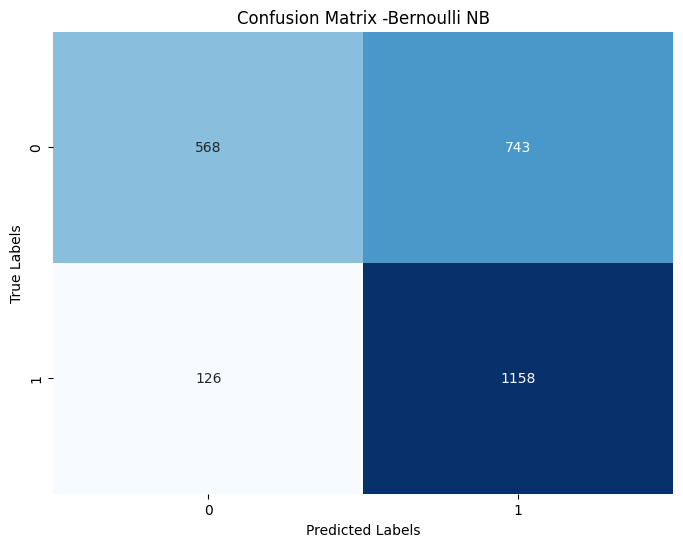

Bernoulli NB Confusion Matrix (Word2Vec)



SVM Train Accuracy (Word2Vec): 0.68
SVM Test Accuracy (Word2Vec): 0.67
SVM Classification Report (Word2Vec):
              precision    recall  f1-score   support

         not       0.82      0.44      0.58      1311
         off       0.61      0.90      0.73      1284

    accuracy                           0.67      2595
   macro avg       0.72      0.67      0.65      2595
weighted avg       0.72      0.67      0.65      2595



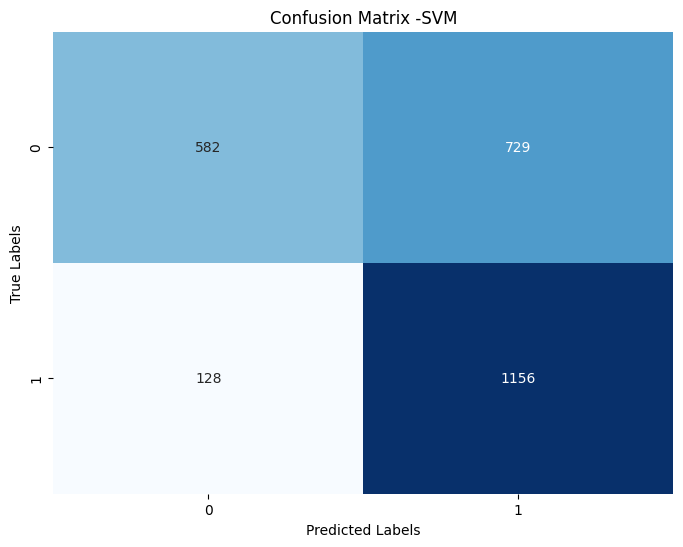

SVM Confusion Matrix (Word2Vec)



Logistic Regression Train Accuracy (Word2Vec): 0.68
Logistic Regression Test Accuracy (Word2Vec): 0.67
Logistic Regression Classification Report (Word2Vec):
              precision    recall  f1-score   support

         not       0.78      0.48      0.60      1311
         off       0.62      0.86      0.72      1284

    accuracy                           0.67      2595
   macro avg       0.70      0.67      0.66      2595
weighted avg       0.70      0.67      0.66      2595



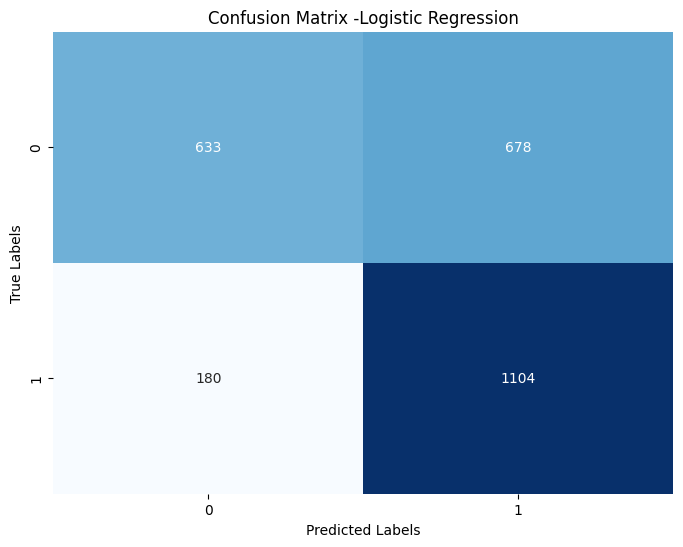

Logistic Regression Confusion Matrix (Word2Vec)



KNN Train Accuracy (Word2Vec): 0.80
KNN Test Accuracy (Word2Vec): 0.74
KNN Classification Report (Word2Vec):
              precision    recall  f1-score   support

         not       0.91      0.54      0.68      1311
         off       0.67      0.95      0.79      1284

    accuracy                           0.74      2595
   macro avg       0.79      0.75      0.73      2595
weighted avg       0.79      0.74      0.73      2595



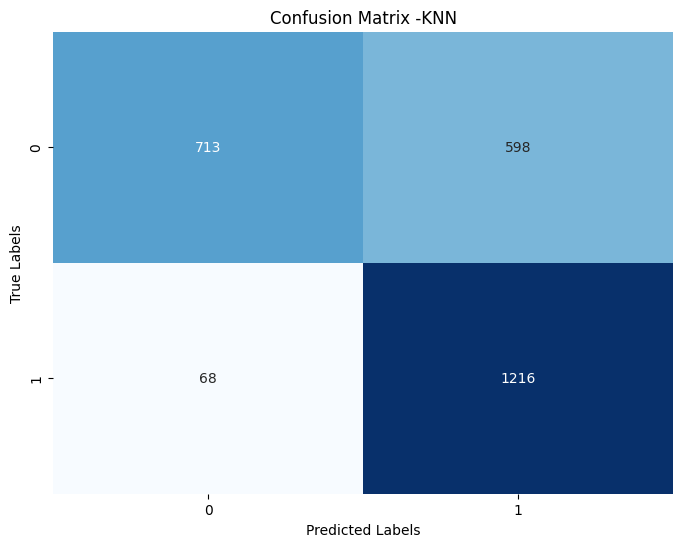

KNN Confusion Matrix (Word2Vec)



RandomForest Train Accuracy (Word2Vec): 1.00
RandomForest Test Accuracy (Word2Vec): 0.86
RandomForest Classification Report (Word2Vec):
              precision    recall  f1-score   support

         not       0.92      0.79      0.85      1311
         off       0.81      0.93      0.87      1284

    accuracy                           0.86      2595
   macro avg       0.86      0.86      0.86      2595
weighted avg       0.87      0.86      0.86      2595



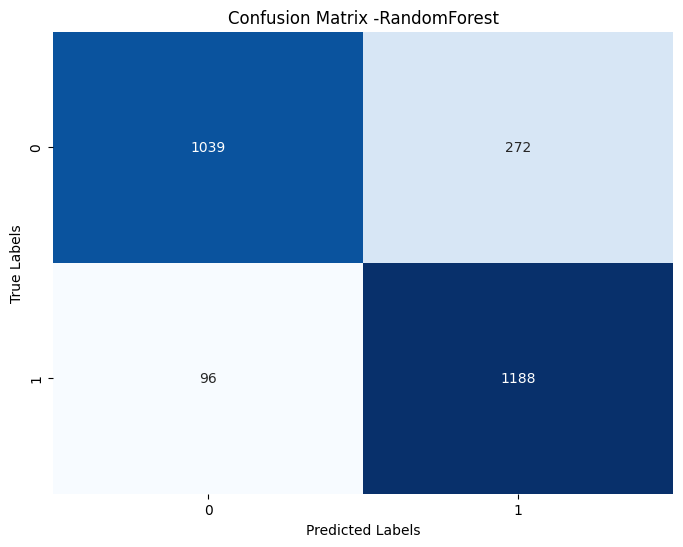

RandomForest Confusion Matrix (Word2Vec)



Decision Tree Train Accuracy (Word2Vec): 1.00
Decision Tree Test Accuracy (Word2Vec): 0.77
Decision Tree Classification Report (Word2Vec):
              precision    recall  f1-score   support

         not       0.79      0.73      0.76      1311
         off       0.74      0.81      0.77      1284

    accuracy                           0.77      2595
   macro avg       0.77      0.77      0.77      2595
weighted avg       0.77      0.77      0.77      2595



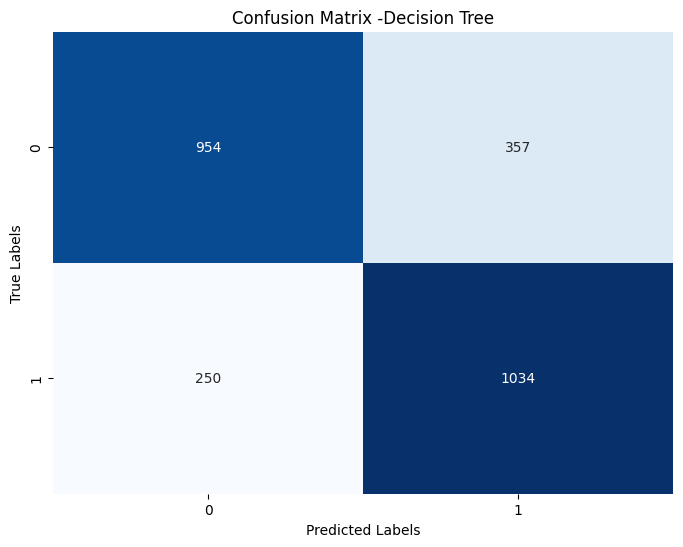

Decision Tree Confusion Matrix (Word2Vec)





In [ ]:
perform_classification("Word2Vec", merged_data)


Original class distribution: Counter({'not': 5189, 'off': 1261})
Resampled class distribution: Counter({'not': 5189, 'off': 5189})
Bernoulli NB Train Accuracy (BOW): 0.79
Bernoulli NB Test Accuracy (BOW): 0.76
Bernoulli NB Classification Report (BOW):
              precision    recall  f1-score   support

         not       0.82      0.67      0.74      1311
         off       0.72      0.85      0.78      1284

    accuracy                           0.76      2595
   macro avg       0.77      0.76      0.76      2595
weighted avg       0.77      0.76      0.76      2595



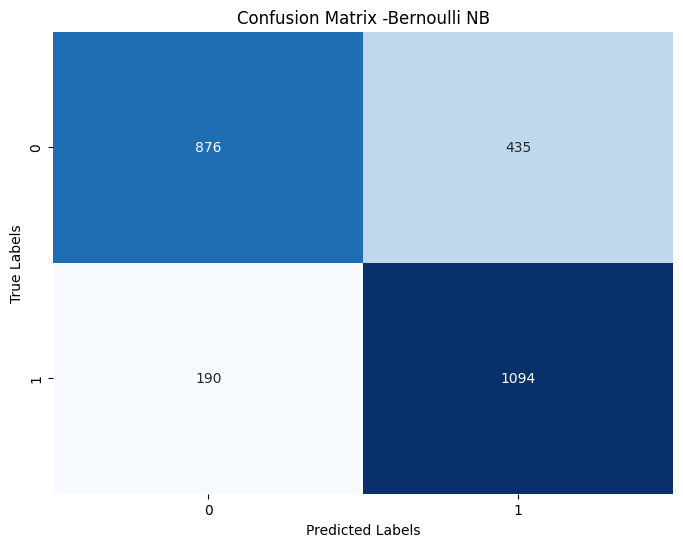

Bernoulli NB Confusion Matrix (BOW)



SVM Train Accuracy (BOW): 0.88
SVM Test Accuracy (BOW): 0.80
SVM Classification Report (BOW):
              precision    recall  f1-score   support

         not       0.84      0.73      0.78      1311
         off       0.76      0.86      0.81      1284

    accuracy                           0.80      2595
   macro avg       0.80      0.80      0.80      2595
weighted avg       0.80      0.80      0.80      2595



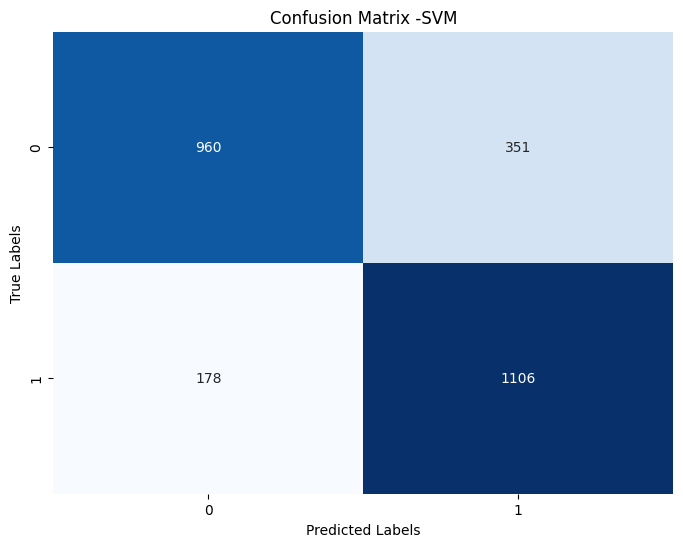

SVM Confusion Matrix (BOW)





/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Train Accuracy (BOW): 0.86
Logistic Regression Test Accuracy (BOW): 0.79
Logistic Regression Classification Report (BOW):
              precision    recall  f1-score   support

         not       0.84      0.72      0.78      1311
         off       0.75      0.86      0.80      1284

    accuracy                           0.79      2595
   macro avg       0.80      0.79      0.79      2595
weighted avg       0.80      0.79      0.79      2595



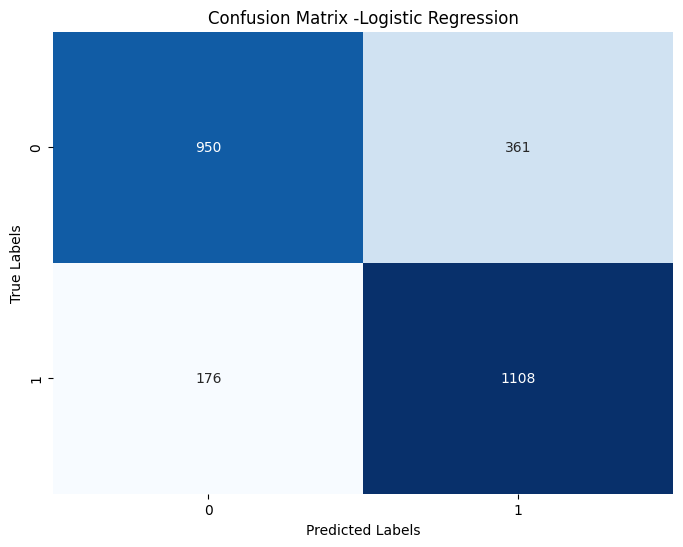

Logistic Regression Confusion Matrix (BOW)



KNN Train Accuracy (BOW): 0.71
KNN Test Accuracy (BOW): 0.65
KNN Classification Report (BOW):
              precision    recall  f1-score   support

         not       0.94      0.32      0.48      1311
         off       0.59      0.98      0.73      1284

    accuracy                           0.65      2595
   macro avg       0.76      0.65      0.61      2595
weighted avg       0.77      0.65      0.60      2595



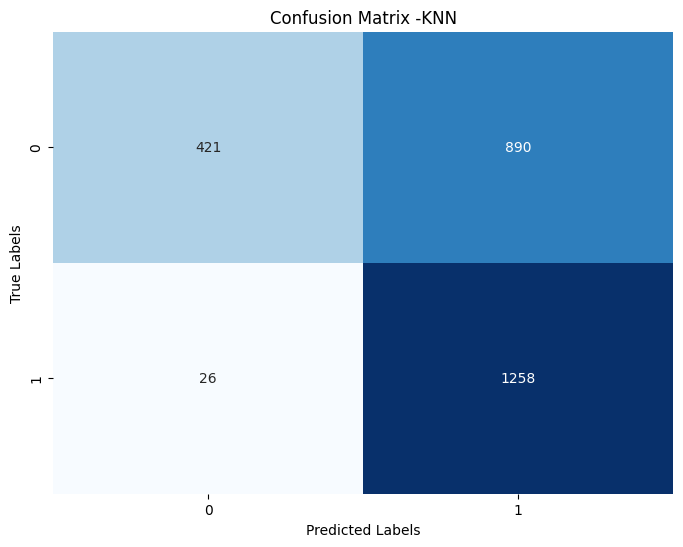

KNN Confusion Matrix (BOW)



RandomForest Train Accuracy (BOW): 1.00
RandomForest Test Accuracy (BOW): 0.83
RandomForest Classification Report (BOW):
              precision    recall  f1-score   support

         not       0.84      0.82      0.83      1311
         off       0.82      0.84      0.83      1284

    accuracy                           0.83      2595
   macro avg       0.83      0.83      0.83      2595
weighted avg       0.83      0.83      0.83      2595



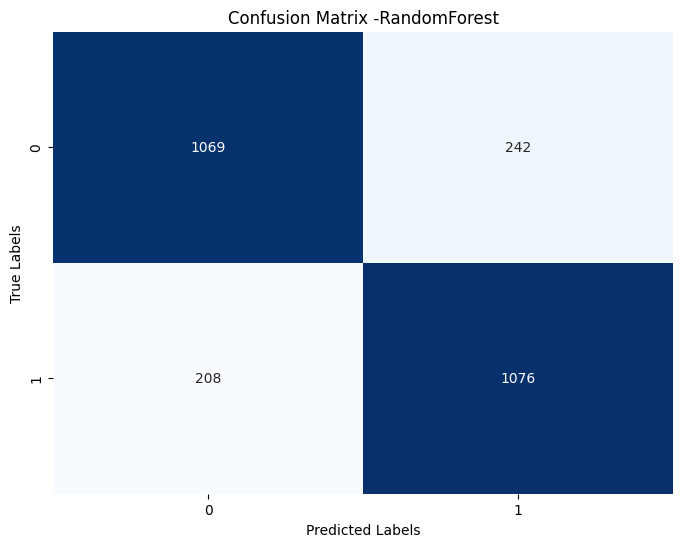

RandomForest Confusion Matrix (BOW)



Decision Tree Train Accuracy (BOW): 1.00
Decision Tree Test Accuracy (BOW): 0.77
Decision Tree Classification Report (BOW):
              precision    recall  f1-score   support

         not       0.82      0.71      0.76      1311
         off       0.74      0.84      0.79      1284

    accuracy                           0.77      2595
   macro avg       0.78      0.77      0.77      2595
weighted avg       0.78      0.77      0.77      2595



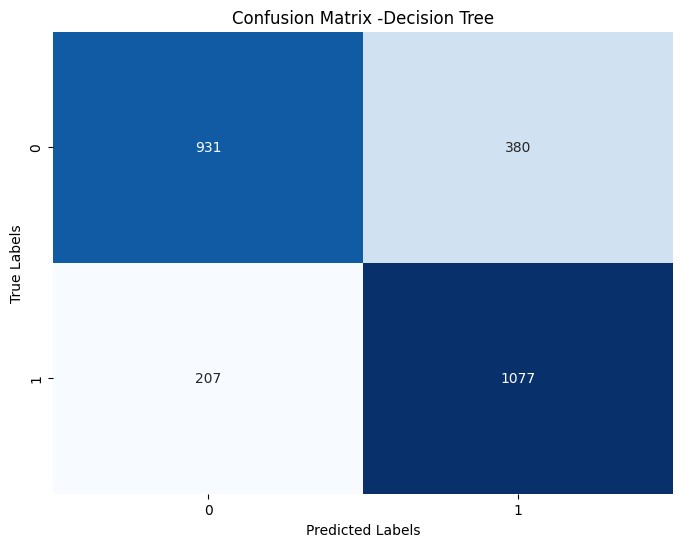

Decision Tree Confusion Matrix (BOW)





In [ ]:

perform_classification("BOW", merged_data)


Original class distribution: Counter({'not': 5189, 'off': 1261})
Resampled class distribution: Counter({'not': 5189, 'off': 5189})
Bernoulli NB Train Accuracy (TF-IDF): 0.80
Bernoulli NB Test Accuracy (TF-IDF): 0.78
Bernoulli NB Classification Report (TF-IDF):
              precision    recall  f1-score   support

         not       0.74      0.86      0.80      1311
         off       0.83      0.70      0.76      1284

    accuracy                           0.78      2595
   macro avg       0.78      0.78      0.78      2595
weighted avg       0.78      0.78      0.78      2595



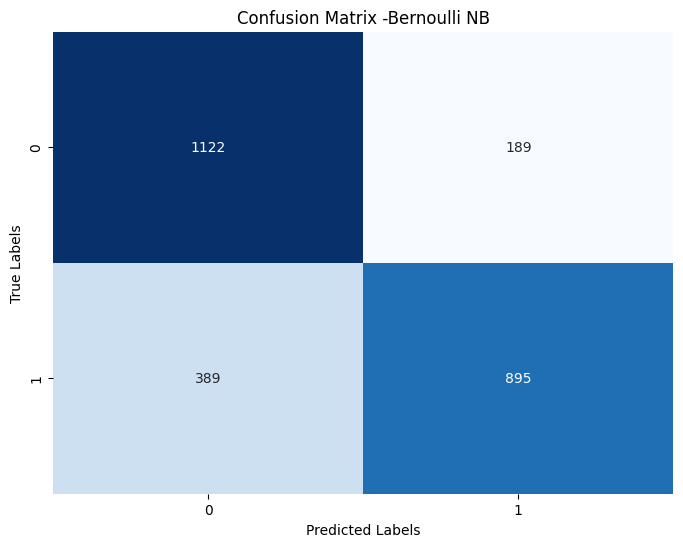

Bernoulli NB Confusion Matrix (TF-IDF)



SVM Train Accuracy (TF-IDF): 0.87
SVM Test Accuracy (TF-IDF): 0.82
SVM Classification Report (TF-IDF):
              precision    recall  f1-score   support

         not       0.88      0.75      0.81      1311
         off       0.78      0.89      0.83      1284

    accuracy                           0.82      2595
   macro avg       0.83      0.82      0.82      2595
weighted avg       0.83      0.82      0.82      2595



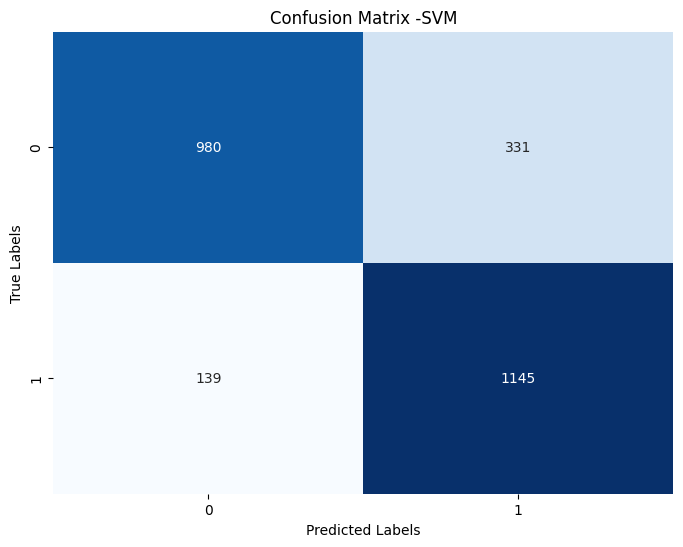

SVM Confusion Matrix (TF-IDF)



Logistic Regression Train Accuracy (TF-IDF): 0.85
Logistic Regression Test Accuracy (TF-IDF): 0.80
Logistic Regression Classification Report (TF-IDF):
              precision    recall  f1-score   support

         not       0.84      0.76      0.79      1311
         off       0.77      0.85      0.81      1284

    accuracy                           0.80      2595
   macro avg       0.80      0.80      0.80      2595
weighted avg       0.80      0.80      0.80      2595



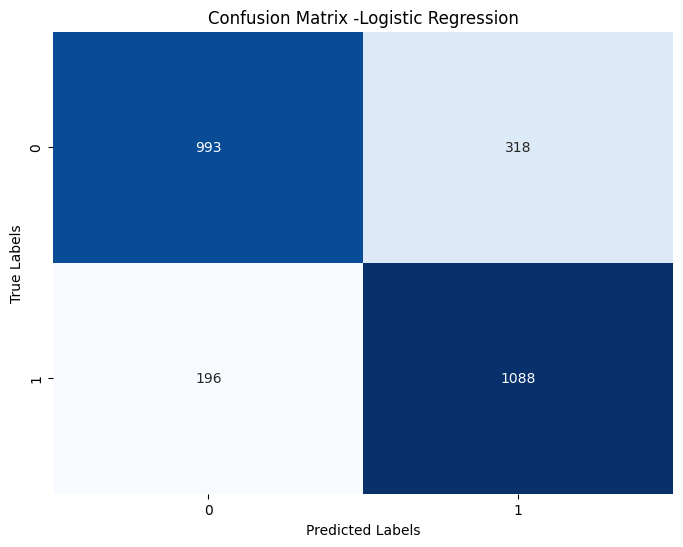

Logistic Regression Confusion Matrix (TF-IDF)



KNN Train Accuracy (TF-IDF): 0.93
KNN Test Accuracy (TF-IDF): 0.80
KNN Classification Report (TF-IDF):
              precision    recall  f1-score   support

         not       0.96      0.64      0.77      1311
         off       0.72      0.98      0.83      1284

    accuracy                           0.80      2595
   macro avg       0.84      0.81      0.80      2595
weighted avg       0.85      0.80      0.80      2595



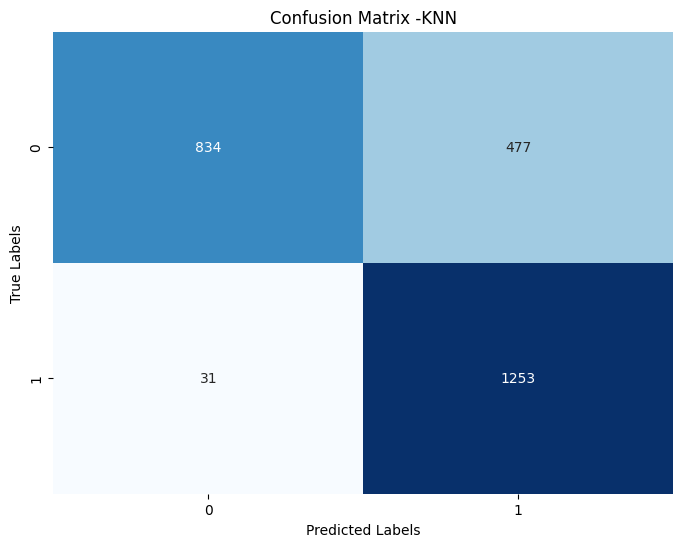

KNN Confusion Matrix (TF-IDF)



RandomForest Train Accuracy (TF-IDF): 1.00
RandomForest Test Accuracy (TF-IDF): 0.90
RandomForest Classification Report (TF-IDF):
              precision    recall  f1-score   support

         not       0.91      0.88      0.90      1311
         off       0.88      0.91      0.90      1284

    accuracy                           0.90      2595
   macro avg       0.90      0.90      0.90      2595
weighted avg       0.90      0.90      0.90      2595



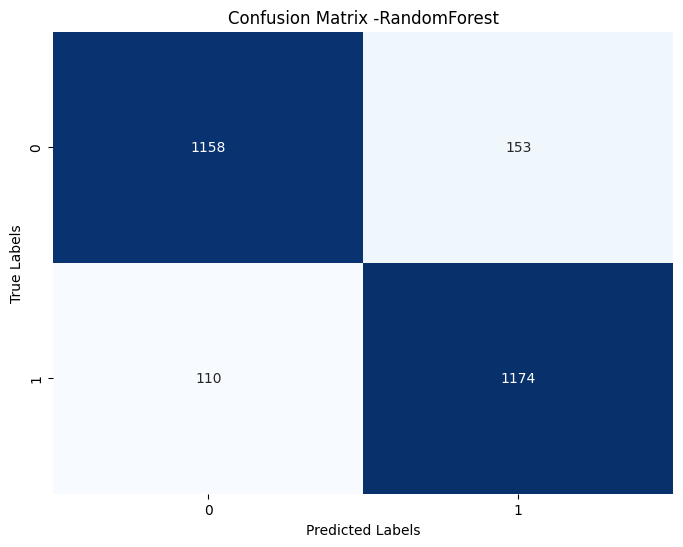

RandomForest Confusion Matrix (TF-IDF)



Decision Tree Train Accuracy (TF-IDF): 1.00
Decision Tree Test Accuracy (TF-IDF): 0.80
Decision Tree Classification Report (TF-IDF):
              precision    recall  f1-score   support

         not       0.81      0.80      0.80      1311
         off       0.80      0.81      0.80      1284

    accuracy                           0.80      2595
   macro avg       0.80      0.80      0.80      2595
weighted avg       0.80      0.80      0.80      2595



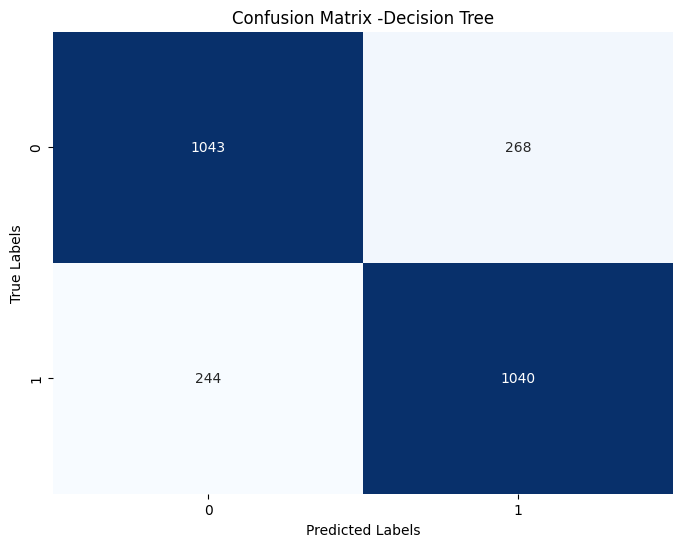

Decision Tree Confusion Matrix (TF-IDF)





In [ ]:
perform_classification("TF-IDF", merged_data)